# Data Mining for Business Analytics

## Similarity, Neighbors

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***


## Clustering

We already saw how we can use _similarity_ between two instances to produce recommendations, even in the absence of a target variable.

_Similarity_ is also a key element in **clustering**, i.e., the generation of _natural groups_ of our instances. We have already seen that different similarity measures result in different _rankings_ of the same set of instances. With that in mind, the _similarity_ that we use greatly affects the result of our **clustering** algorithms.


Below, we discuss 2 different clustering techniques:
* $k$-Means
* Hierarchical Clustering

Through our discussion, you need to be able to understand:
1. How **clustering** differs from **classification**
1. What is _the result_ of a clustering algorithm
1. How $k$-Means works
1. How hierarchical clustering works

***

Take a look at the following image

<img src="images/raw_data.png" />


How many _clusters_ / "natural groupings" of the data do you see?


Take a look at the same image, where the data points are associated with one of two classes: Red or Blue.

<img src="images/class_data.png" />

During _classification_ , our data points (instances) come with those _predefined_ classes. The class value of an instance appears in the _target variable_.

***

**Question:** Using the two earlier images and the brief explanations above, how do _you_ think that clustering differs from classification?


**Answer:** (write down your thoughts)

***

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 10, 8


## KMeans

The "classic" approach for findings clusters is via the **$k$-Means algorithm**, which will find a set of $k$ clusters.

The value $k$ is a **parameter** to the model, i.e. **we** must provide the number of clusters that we expect the algorithm to find.

**Question:** _What_ is a good $k$ value for the algorithm?


Here's a video of how the algorithm works: https://www.youtube.com/watch?v=BVFG7fd1H30


The $k$-Means algorithm is implemented in all major (self-respecting) data mining libraries. It's also available under **sklearn.cluster**.



In [2]:
# Let's read our Whiskey data again
data = pd.read_csv("data/scotch.csv")
data = data.drop([u'age', u'dist', u'score', u'percent', u'region', u'district', u'islay', u'midland', u'spey', u'east', u'west', u'north ', u'lowland', u'campbell', u'islands'], axis=1)
data.head()

,color.wyne,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,color.p.amber,...,fin.smoke,fin.sweet,fin.spice,fin.oil,fin.salt,fin.arome,fin.ling,fin.long,fin.very,fin.quick
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
# Let's train a kMeans model over the whiskeys. We want 6 clusters.
k_clusters = 6

## Fit clusters like in our previous models/transformations/standarization 
## (e.g. Logistic, Vectorization,...)

model = KMeans(k_clusters)
model.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

***

What clusters do we get? Let's get "predictions" of the model. To do that, we will use the `predict()` method of the kmeans cluster.

**Question:** Clustering is an **unsupervised** task. What do you think we mean by "prediction" here then?

> predict which cluster should the new instance belong to.

**Question:** How do we compute this distance between an instance and a cluster?

> 1. dist between the instance & the **center point** (a.k.a. the **average pt**) of the cluster
> 2. dist between the instnace & the **minimum point** of the cluster
> 3. dist between the instnace & the **maximum point** of the cluster

In [4]:
print ("Records in our dataset (rows): ", len(data.index))
print ("Then we predict one cluster per record, which means length of: ", len(model.predict(data)) )


Records in our dataset (rows):  109
Then we predict one cluster per record, which means length of:  109


In [5]:
# The index index contains the names of the whiskeys that we know of
data.index

Index(['Aberfeldy', 'Aberlour', 'Ardberg', 'Ardmore', 'Auchentoshan',
       'Aultmore', 'Balblair', 'Balmenach', 'Balvenie', 'Banff',
       ...
       'Strathisla', 'Talisker', 'Tamdhu', 'Tamnavulin', 'Teaninich',
       'Tobermory', 'Tomatin', 'Tomintoul', 'Tormore', 'Tullibardine'],
      dtype='object', length=109)

In [6]:
clusters = model.predict(data)

clusters

array([2, 2, 4, 1, 1, 1, 5, 0, 0, 2, 5, 1, 0, 4, 5, 1, 4, 2, 1, 1, 5, 2,
       1, 5, 4, 2, 1, 2, 2, 2, 3, 4, 1, 4, 5, 1, 4, 1, 5, 5, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 5,
       4, 0, 2, 4, 5, 5, 4, 5, 1, 2, 1, 4, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 0, 4, 1, 2, 1, 2, 2, 1, 4, 2, 5, 2, 1, 2, 2, 0, 1, 2, 1],
      dtype=int32)

What do you think that the above numbers mean?
***

Let's print each instance with its associated cluster **and** the cluster _centroids_

In [7]:
l = []
data_predicts = model.predict(data)
for i, cid in zip(data.index, data_predicts):
    row_list = [i, cid]
    row_list.extend(model.cluster_centers_[cid])
    l.append(row_list)

colNames = ['Whiskey','Cluster_predicted']
colNames.extend( [ 'Cluster ' + c for c in data.columns ]  )
pd.DataFrame( l, columns=colNames )[0:10]


,Whiskey,Cluster_predicted,Cluster color.wyne,Cluster color.yellow,Cluster color.v.pale,Cluster color.pale,Cluster color.p.gold,Cluster color.gold,Cluster color.o.gold,Cluster color.f.gold,...,Cluster fin.smoke,Cluster fin.sweet,Cluster fin.spice,Cluster fin.oil,Cluster fin.salt,Cluster fin.arome,Cluster fin.ling,Cluster fin.long,Cluster fin.very,Cluster fin.quick
0,Aberfeldy,2,0.027778,0.027778,0.000000,0.000000,6.938894e-17,8.333333e-02,0.027778,0.472222,...,3.055556e-01,0.166667,1.388889e-01,-4.857226e-17,0.000000,5.555556e-02,0.083333,0.166667,0.027778,0.055556
1,Aberlour,2,0.027778,0.027778,0.000000,0.000000,6.938894e-17,8.333333e-02,0.027778,0.472222,...,3.055556e-01,0.166667,1.388889e-01,-4.857226e-17,0.000000,5.555556e-02,0.083333,0.166667,0.027778,0.055556
2,Ardberg,4,0.000000,0.000000,0.000000,0.000000,7.142857e-02,2.857143e-01,0.071429,0.142857,...,2.857143e-01,0.142857,-5.551115e-17,7.142857e-02,0.500000,-2.775558e-17,0.214286,0.142857,0.142857,0.214286
3,Ardmore,1,0.114286,0.000000,0.057143,0.114286,2.285714e-01,3.142857e-01,0.000000,0.114286,...,1.428571e-01,0.228571,8.571429e-02,5.714286e-02,0.028571,1.428571e-01,0.057143,0.228571,0.028571,0.028571
4,Auchentoshan,1,0.114286,0.000000,0.057143,0.114286,2.285714e-01,3.142857e-01,0.000000,0.114286,...,1.428571e-01,0.228571,8.571429e-02,5.714286e-02,0.028571,1.428571e-01,0.057143,0.228571,0.028571,0.028571
5,Aultmore,1,0.114286,0.000000,0.057143,0.114286,2.285714e-01,3.142857e-01,0.000000,0.114286,...,1.428571e-01,0.228571,8.571429e-02,5.714286e-02,0.028571,1.428571e-01,0.057143,0.228571,0.028571,0.028571
6,Balblair,5,0.153846,0.076923,0.000000,0.000000,1.387779e-17,2.307692e-01,0.000000,0.230769,...,2.775558e-17,0.076923,3.076923e-01,0.000000e+00,0.000000,-2.775558e-17,0.153846,0.153846,0.000000,0.000000
7,Balmenach,0,0.000000,0.000000,0.000000,0.000000,1.111111e-01,2.775558e-17,0.000000,0.111111,...,1.111111e-01,0.111111,2.222222e-01,3.333333e-01,0.000000,0.000000e+00,0.111111,0.444444,0.000000,0.000000
8,Balvenie,0,0.000000,0.000000,0.000000,0.000000,1.111111e-01,2.775558e-17,0.000000,0.111111,...,1.111111e-01,0.111111,2.222222e-01,3.333333e-01,0.000000,0.000000e+00,0.111111,0.444444,0.000000,0.000000
9,Banff,2,0.027778,0.027778,0.000000,0.000000,6.938894e-17,8.333333e-02,0.027778,0.472222,...,3.055556e-01,0.166667,1.388889e-01,-4.857226e-17,0.000000,5.555556e-02,0.083333,0.166667,0.027778,0.055556


Let's put each cluster into its own column!


In [8]:

cluster_listing = {}
for cluster in range(k_clusters):
    cluster_name = 'Cluster ' + str(cluster)
    cluster_listing[cluster_name] = [''] * len(data)
    where_in_cluster = np.where(clusters == cluster)[0]
    cluster_listing[cluster_name][0:len(where_in_cluster)] = data.index[where_in_cluster]

# Print clusters
pd.DataFrame(cluster_listing).loc[0:np.max(np.bincount(clusters)) - 1,:]


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,Balmenach,Ardmore,Aberfeldy,Dalmore,Ardberg,Balblair
1,Balvenie,Auchentoshan,Aberlour,Glenturret,Benromach,Ben Nevis
2,Benrinnes,Aultmore,Banff,,Bowmore,Bladnoch
3,Glendullan,Benriach,Brackla,,Coleburn,Caol Ila
4,Highland Park,Blair Athol,Caperdonich,,Dalwhinnie,Clynelish
5,Lochside,Bruichladdich,Convalmore,,Dufftown,Edradour
6,Oban,Bunnahabhain,Craigellachie,,Glen Albyn,Glenburgie
7,Port Ellen,Cardhu,Dailuaine,,Glenlochy,Glencadam
8,Tomatin,Cragganmore,Dallas Dhu,,Glenury Royal,Glenugie
9,,Deanston,Glendronach,,Inchgower,Inchmurrin


What do you think, to the results make sense?

## Another clustering application, closer to home (all puns intended)

Well, we can cluster whiskeys, we can cluster wines and we can cluster documents (e.g., news articles), but whether the results are particularly meaningful or not is often open for interpretation and left as follow-up work for the data scientist, in collaboration with a domain expert (i.e., a wine taster perhaps?).

So, let's work with some data that we can get a better understanding of: _locations_ ! 


Under the `data/` directory, there is a file with GPS coordinates in it. The file contains several lines, each of which is a GPS signal (longitude, latitude). Let's read the file and see what it's about.  The file uses the comma `','` as a separator between the columns, so we'll specify that. The data is also in decimal format (`float`).

*** 

In [9]:
coordinates = pd.read_csv( "data/locations.csv", sep=',', dtype=float )
coordinates.head()

,long,lat
0,-73.986335,40.745933
1,-73.982152,40.773872
2,-73.988590,40.753570
3,-73.979145,40.744562
4,-73.997930,40.721157


Instead of me telling you what these locations are, let's actually show them on a figure.

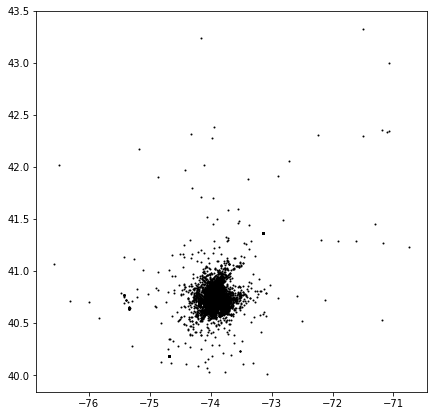

In [10]:
fig = plt.figure(figsize=(7, 7))  # Small plot at first
plt.scatter( coordinates['long'], coordinates['lat'], c='black', s=(72./fig.dpi)**2 )  # The value next to 's' is the size of a pixel!
plt.show()

What is this blob!? We can't make anything out of it! OK, it seems that most of the information is centered around some specific ranges though.

***

So, let's plot again by focusing on these ranges and we'll blow up the image a bit more. For the ranges, we'll use the `xlim()` and `ylim()` methods of the matplotlib library.

Try it in the code below!

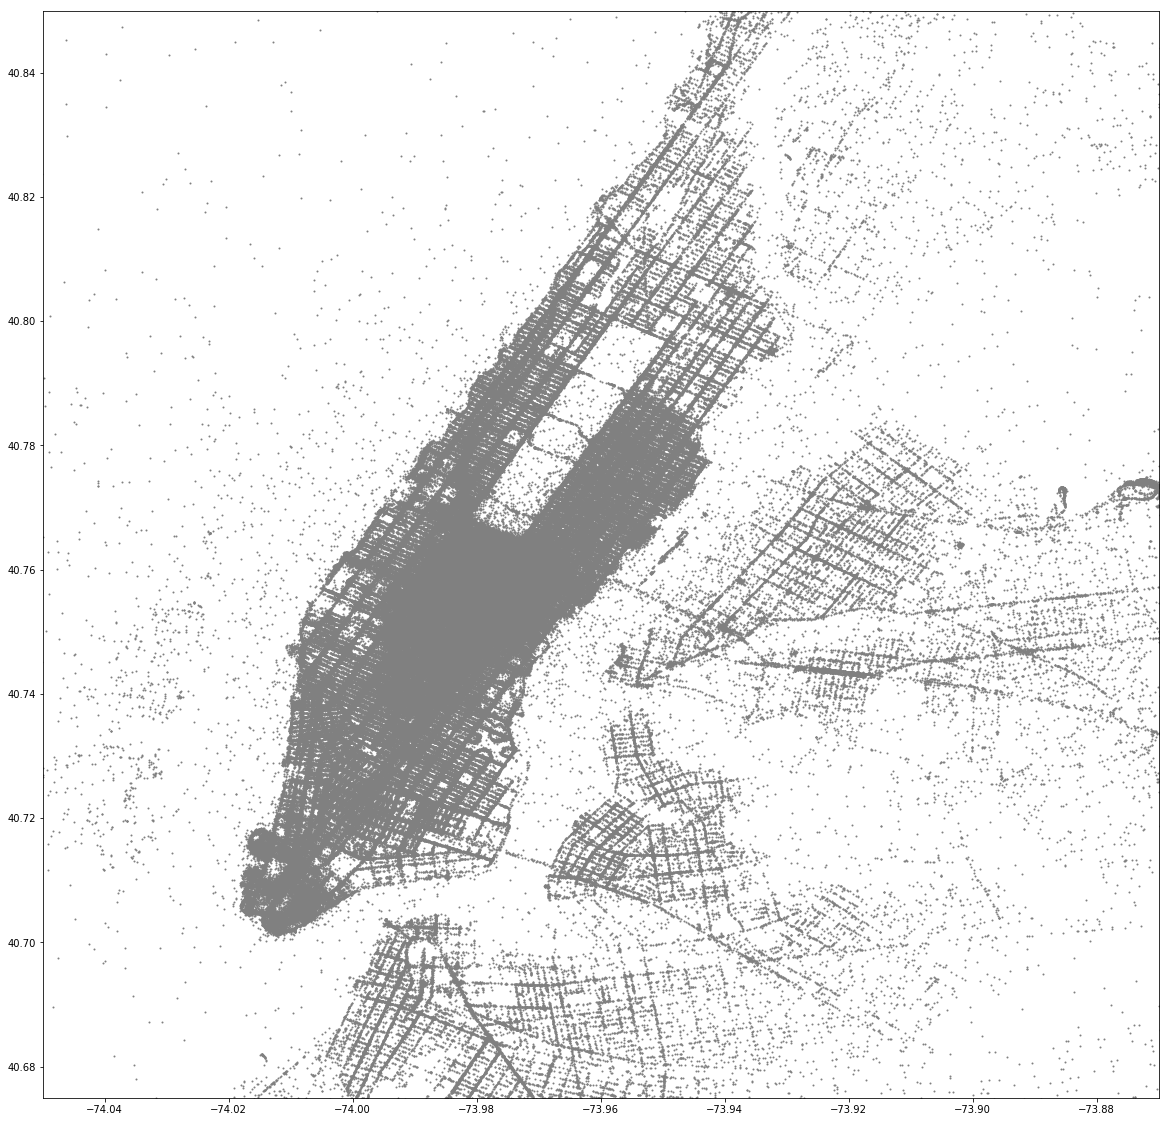

In [11]:
fig = plt.figure(figsize=(20, 20))  # Let's create a bigger picture

plt.scatter( coordinates['long'], coordinates['lat'], c='grey', s=(72./fig.dpi)**2 )  # The value next to 's' is the size of a pixel!

# Pick the ranges that will help you figure out what the shape is about
plt.xlim( -74.05, -73.87 )  # That's for the x-coordinate range. Format is: x_min, x_max
plt.ylim( 40.675, 40.850 )  # That's for the y-coordinate range. Format is: x_min, x_max

plt.show()

Aha! Now it starts to make sense. OK, let's use these coordinates to actually find some clusters of the coordinates.

Now, $k$-Means is fast, but it's not "classroom demo" fast. For that reason, we'll _sample_ our coordinates and use only 10000 of them. You can try with the entire dataset on your own.

In [12]:
sample_coords = coordinates.sample(10000)

In [13]:
# Let's create 30 clusters. You can try different values and see how the results change.
k_clusters = 30

model = KMeans(k_clusters)

# Train the model on the sample coordinates, not the original.
model.fit(sample_coords)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Let's predict the cluster that each coordinate belongs to!
# Notice that we are now doing this for ALL coordinates
predict_ids = model.predict(coordinates)

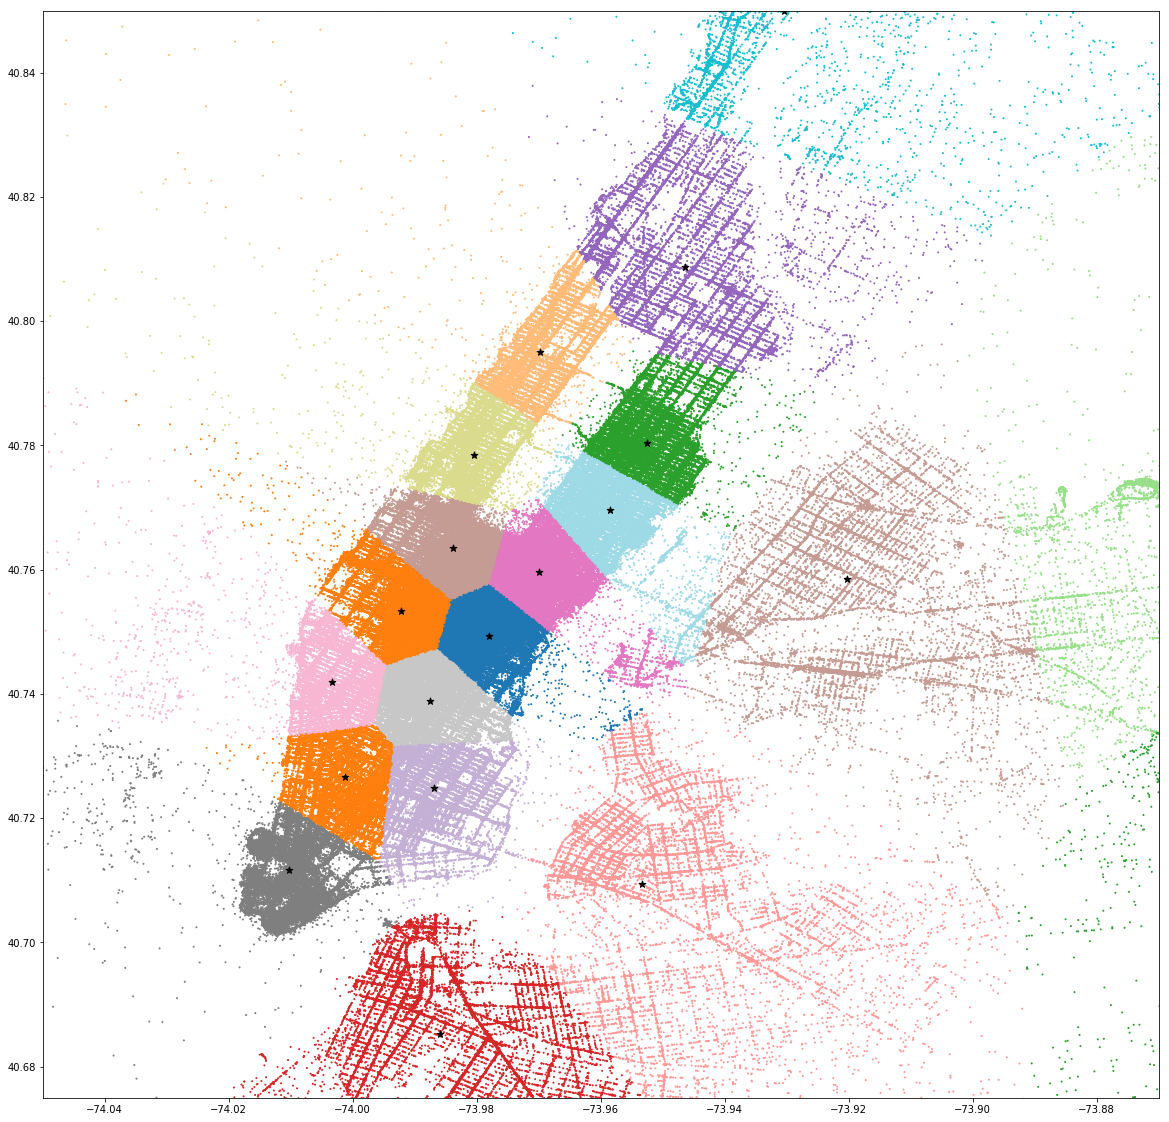

In [15]:
# Transpose the matrix: get every row as a column and every column as a row
# We do this so that we can pass the information to the scatter plot below.
clust_coords = model.cluster_centers_.T

fig = plt.figure(figsize=(20, 20))
plt.scatter( coordinates['long'], coordinates['lat'], c=predict_ids, s=(72./fig.dpi)**2, cmap='tab20' )
plt.scatter( clust_coords[0], clust_coords[1], c='black', s=50, marker='*' )

# Use the coordinates that you had earlier, to make the plot look nice!
plt.xlim( -74.05, -73.87 )  # That's for the x-coordinate range. Format is: x_min, x_max
plt.ylim( 40.675, 40.850 )  # That's for the y-coordinate range. Format is: x_min, x_max

plt.show()

What do you think? Do the star-shaped points make _some_ sense? Do the colored regions make sense?

### <div style="color: red">A note on visualization</div>

The above exercise should show the importance of _visualizing_ information for several reasons.

- First, it is more intuitive and easier to explain -- an image is said to be worth 1000 words after all! There is, in fact, an entire science / discipline around visualizing information.

- Second, this type of visualization allows us to see issues that we have with our data. Can you spot any?


## Hierarchical Clustering

kMeans is just one way to find similar groups, but not the only one. Another very common method is Hierarchical Clustering.

First let's look at a simple example to illustrate.  Given a set of records (A-F) with two features, we can visualize them on a 2 dimensional surface.  Clustering proceeds as follows.  First consider each point to be its own cluster.  Then, iteratively, group together the closest two clusters.  In the figure, circles were drawn in order of grouping.  The second diagram is a visualization of the hierarchy of groupings, called a "dendrogram."  You can clip it at any point, vertically, and get "the best" clustering for a certain number of groups.


<img src="images/cutting.png" height=40% width=40%>

*_Note that Cluster #4 is a parent of clusters 1 and 3._

Here is a visualization of a part of the dendrogram for the whiskey clustering in the book:

<img src="images/cross_section.png" height=70% width=70%>

***



### Dendrograms in code

We'll go back to our Whiskey example to illustrate the dendrogram. We will use the module **scipy.cluster.hierarchy** for this purpose.

The approach is as follows:
1. We start by computing the distance between every pair of whiskeys
1. Then, we will use the `linkage()` method coming from the `scipy.cluster.hierarchy` module. This method will actually perform the hierarchical clustering we want! Notice the difference between this approach and creating the k-Means model. More information about the method is available [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
1. We then pass the resulting hierarchical clustering to the `dendrogram()` method, which will visualize the information in the way that we described earlier.

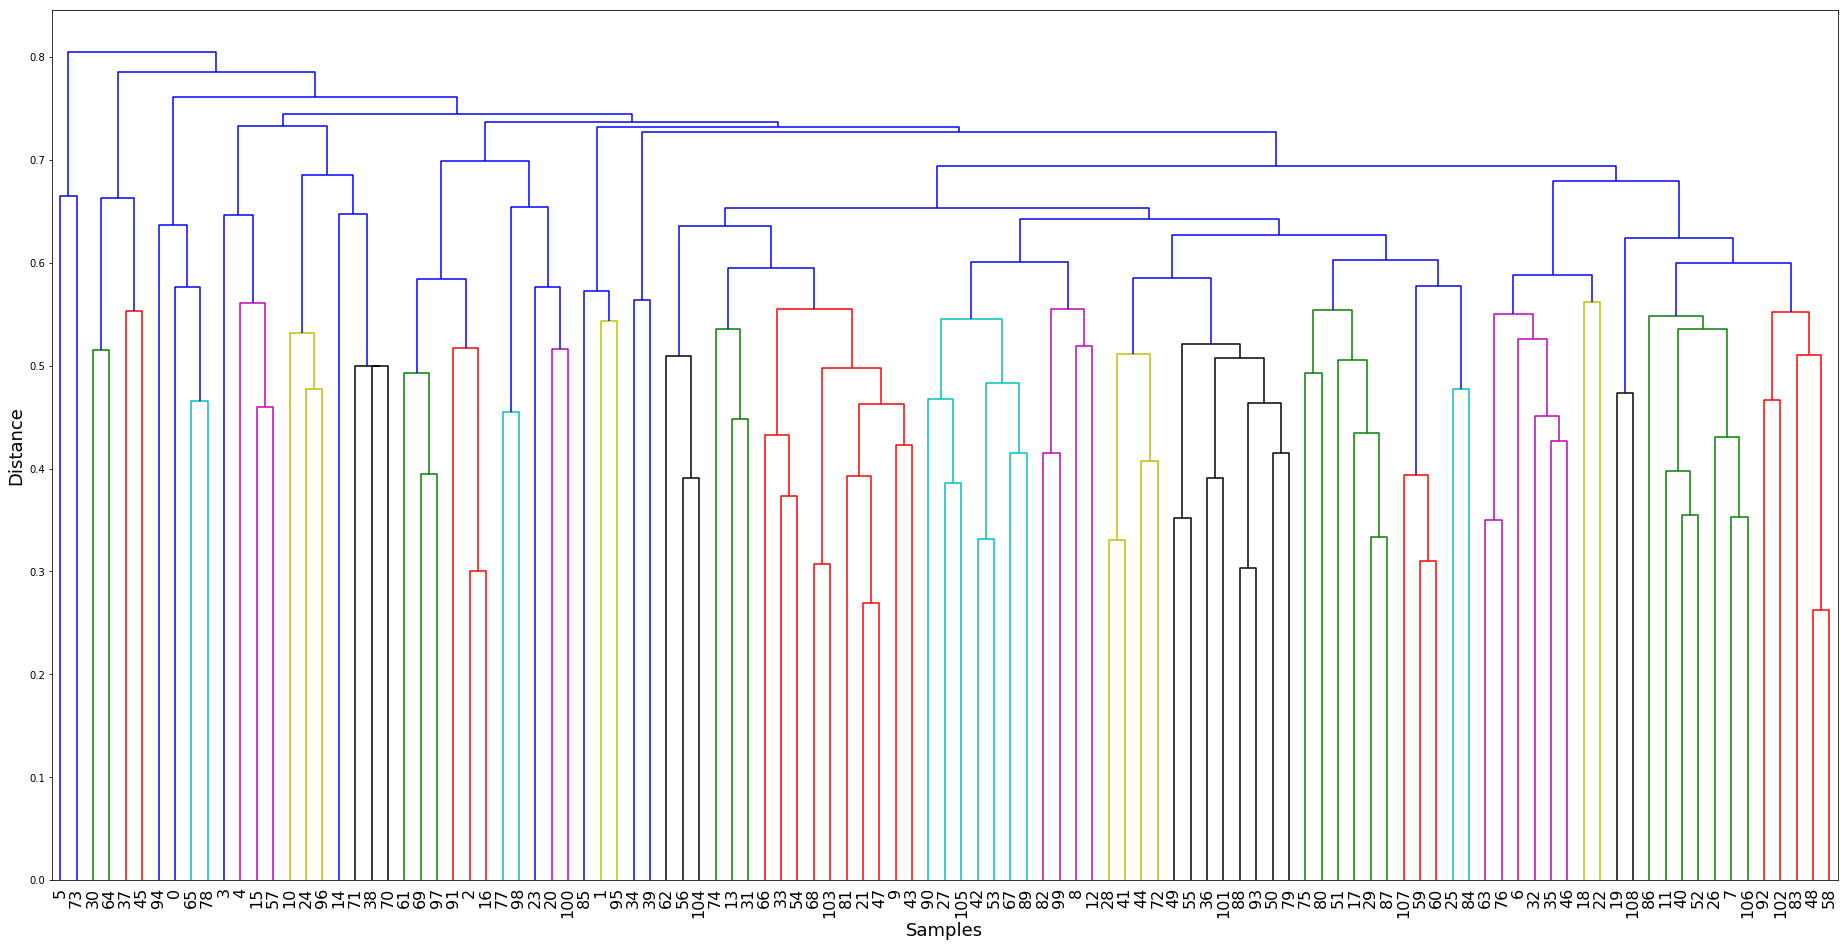

In [16]:
# This function gets pairwise distances between observations in n-dimensional space.
dists = distance.pdist(data, metric="cosine")

# This scipy's function performs hierarchical/agglomerative clustering on the condensed distance matrix y.
links = linkage(dists, method='average')

# Now we want to plot those 'links' using "dendrogram" function
# ATTENTION: This line must come BEFORE the dendrogram() method below!!!
plt.rcParams['figure.figsize'] = 32, 16

den = dendrogram(links)

plt.xlabel('Samples',fontsize=18)
plt.ylabel('Distance',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.show()


We can use other measures:

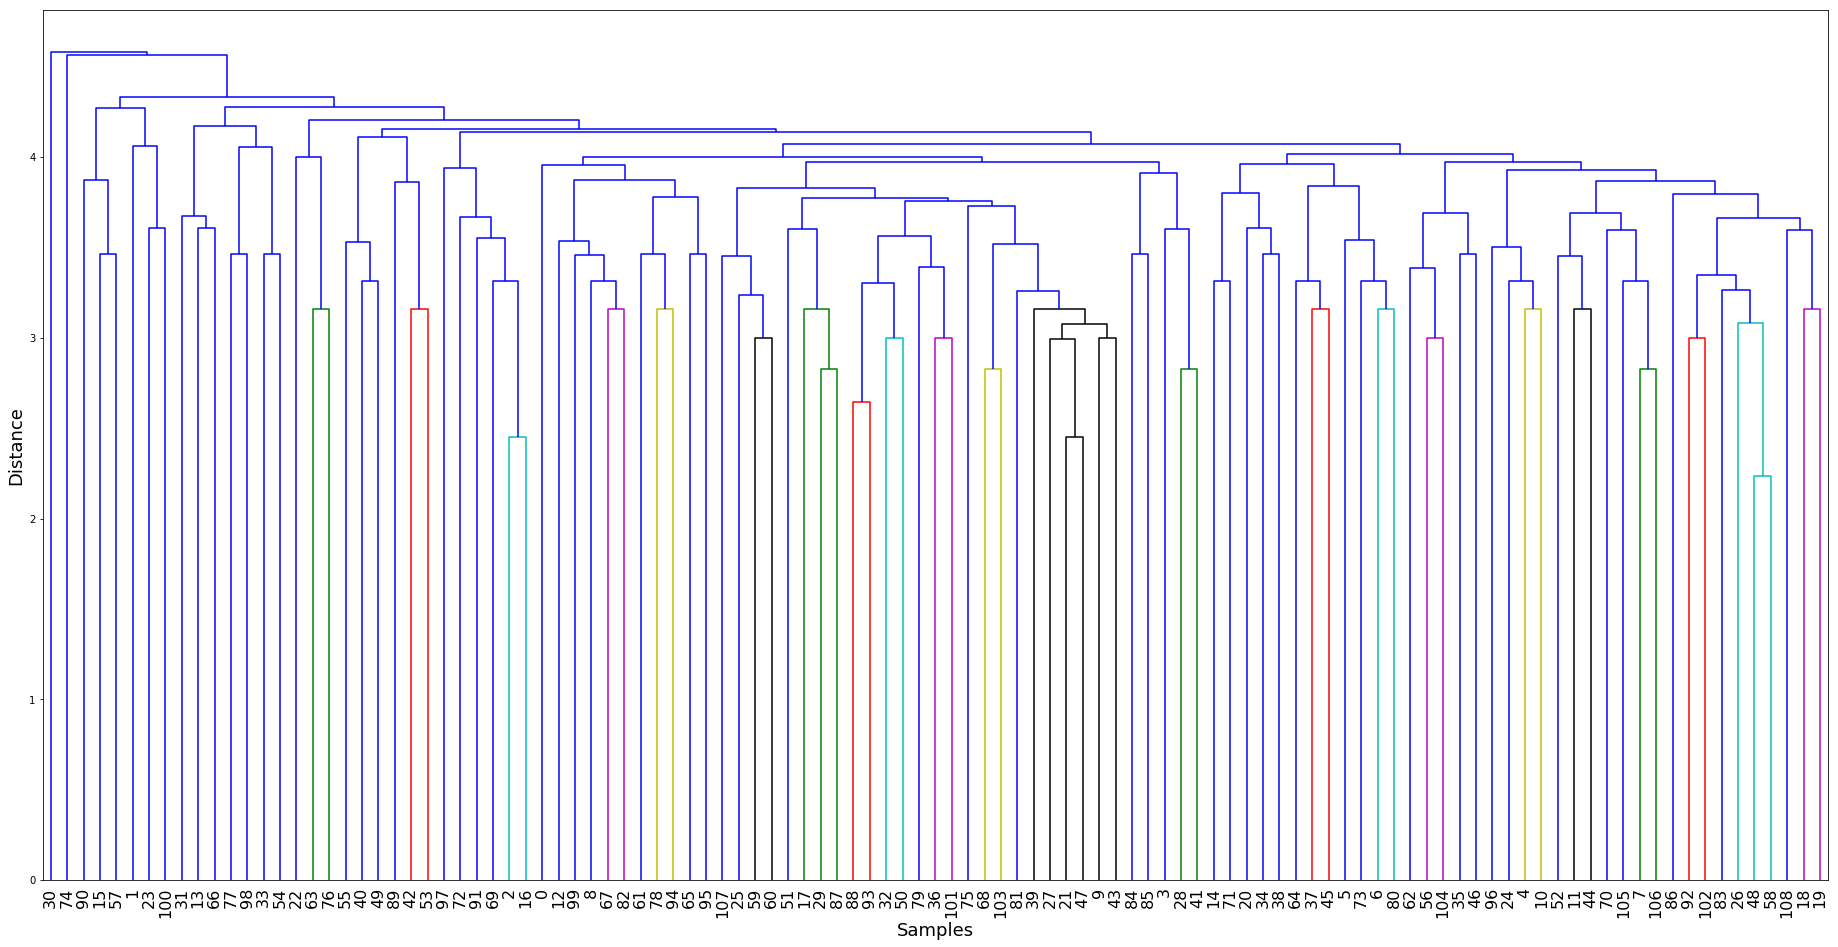

In [17]:
# This function gets pairwise distances between observations in n-dimensional space.
dists = distance.pdist(data, metric="euclidean")

# This scipy's function performs hierarchical/agglomerative clustering on the condensed distance matrix y.
links = linkage(dists, method='average')

# Now we want to plot those 'links' using "dendrogram" function
plt.rcParams['figure.figsize'] = 32, 16

den = dendrogram(links)

plt.xlabel('Samples',fontsize=18)
plt.ylabel('Distance',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.show()


#### Question

Clusters **do not** come with predetermined labels. Can you think of an approach to "characterize them"? Can you think of an _automated approach_ to characterize them?

> We asign 

***

#### Question

Both $k$-Means and Hierarchical Clustering, as described earlier perform **hard clustering**. What do you think that means?

> All value belong to one and only one cluster

***

### Clustering Text

#### (Very Briefly)

Clustering documents (e.g., articles) is a very common task, as it allows us to (very) quickly understand what the corpus (i.e., the entire set of documents) is about. In other words, the task is to figure out the various **topics** discussed in the corpus.

For this type of problem, instead of $k$-Means, we typically use another technique, called  **Latent Dirichlet allocation** (LDA). LDA works differently from $k$-Means, but in the end we still obtain a set of "clusters" / topics, which are characterized by words that appear in the document. 

Just like $k$-Means, LDA expects a parameter $k$ for the number of topics to discover.

Unlike $k$-Means, LDA does _soft_ clustering. What do you think this means?

***